### Student Information
Name:Lu-Ying Huang 黃律瑛

Student ID:114062530

GitHub ID:lu1hOAO

---

### Instructions

### First Phase Submission

1. First: do the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) that considered as **phase 1 (from exercise 1 to exercise 15)**. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: follow the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** up **until phase 1**. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    -  Use [the new dataset](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/newdataset/Reddit-stock-sentiment.csv). The dataset contains a 16 columns including 'text' and 'label', with the sentiment labels being: 1.0 is positive, 0.0 is neutral and -1.0 is negative. You can simplify the dataset and use only the columns that you think are necessary. 
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.
    - Use this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 10% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    


4. Fourth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__

You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (September 28th 11:59 pm, Sunday)__. 

### Second Phase Submission 

**You can keep the answer for phase 1 for easier running and update the phase 2 on the same page.**

1. First: Continue doing the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) for **phase 2, starting from Finding frequent patterns**. Use the same master(.ipynb) file. Answer from phase 1 will not be considered at this stage. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: Continue from first phase and do the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** for phase 2, starting from Finding frequent pattern. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    - Continue using this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output. Use the same new dataset as in phase 1.
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.

3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 20% of your grade.__
    - Use this file to answer.
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency).  Refer to this Scikit-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Note that for the TF-IDF features you might need to use other type of NB classifier different than the one in the Master Notebook. Comment on the differences and when using augmentation with feature pattern.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__


You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 19th 11:59 pm, Sunday)__. 

# Phase 1

### Load the data and check basic information

In [56]:
import pandas as pd
import numpy as np
df= pd.read_csv("newdataset/Reddit-stock-sentiment.csv")

In [2]:
df.shape

(847, 16)

In [3]:
df.columns

Index(['type', 'datetime', 'post_id', 'subreddit', 'title', 'author', 'url',
       'upvotes', 'downvotes', 'upvote_ratio', 'text', 'subjectivity',
       'polarity', 'sentiment', 'entities', 'label'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 847 entries, 0 to 846
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   type          847 non-null    object 
 1   datetime      847 non-null    object 
 2   post_id       847 non-null    object 
 3   subreddit     847 non-null    object 
 4   title         847 non-null    object 
 5   author        847 non-null    object 
 6   url           847 non-null    object 
 7   upvotes       847 non-null    int64  
 8   downvotes     64 non-null     float64
 9   upvote_ratio  64 non-null     float64
 10  text          847 non-null    object 
 11  subjectivity  847 non-null    float64
 12  polarity      847 non-null    float64
 13  sentiment     847 non-null    float64
 14  entities      847 non-null    object 
 15  label         847 non-null    float64
dtypes: float64(6), int64(1), object(9)
memory usage: 106.0+ KB


In [5]:
df.head()

,type,datetime,post_id,subreddit,title,author,url,upvotes,downvotes,upvote_ratio,text,subjectivity,polarity,sentiment,entities,label
0,comment,2025-04-11 17:29:56,mmli62w,wallstreetbets,Retardation is on the menu boys! WSB is so back,StickyTip420,https://i.redd.it/0yq2ftren8ue1.jpeg,0,NaN,NaN,Calls on retards,1.000000,-0.900000,-1.0,[],-1.0
1,comment,2025-04-12 1:12:19,mmnu7v9,wallstreetbets,Retail giant TARGET has now declined for 10 co...,Comfortable-Dog-8437,https://i.redd.it/7tl6puv9waue1.jpeg,-15,NaN,NaN,Stunt as in like why did they even make a big ...,0.177778,0.083333,1.0,"['Stunt', 'company', 'deal', 'place']",0.0
2,comment,2025-04-10 15:09:41,mmeevio,StockMarket,How do you feel about a sitting president maki...,Btankersly66,https://apnews.com/article/trump-truth-social-...,1,NaN,NaN,Seeing lots of red in the ticker.,0.000000,0.000000,0.0,['ticker'],0.0
3,post,2023-08-30 17:12:55,165kllm,stockstobuytoday,Who knows more? $VMAR,emiljenfn,https://www.reddit.com/r/stockstobuytoday/comm...,30,0.0,0.98,Vision Marine Technologies Inc. is rewriting t...,0.646970,0.216383,1.0,"['watercraft', 'skill', 'power', ']', 'feat', ...",1.0
4,comment,2025-04-11 14:48:05,mmkl6bw,StockMarket,The Trump administration is begging Xi Jinping...,Just-Big6411,https://edition.cnn.com/2025/04/10/politics/tr...,1,NaN,NaN,He didn’t say thank you.,0.000000,0.000000,0.0,[],-1.0


In [6]:
print(df["sentiment"].nunique())
print(df["label"].nunique())

3
3


In [7]:
for i,text in enumerate(df["text"].head(3)):
    print(f"example{i+1}==============")
    print(text)
    print()

example1==============
Calls on retards

example2==============
Stunt as in like why did they even make a big deal about starting it in the first place? No company should ever talk about politics ever.

example3==============
Seeing lots of red in the ticker.



### Handle Missing Data 

In [8]:
df=df[df["upvotes"]>=0]
df.shape

(826, 16)

In [9]:
df=df.drop(columns=["downvotes","upvote_ratio"])

In [10]:
df.columns

Index(['type', 'datetime', 'post_id', 'subreddit', 'title', 'author', 'url',
       'upvotes', 'text', 'subjectivity', 'polarity', 'sentiment', 'entities',
       'label'],
      dtype='object')

In [11]:
sum(df.duplicated("text"))

23

In [12]:
df.drop_duplicates(subset=["text"],keep=False,inplace=True)

In [13]:
sum(df.duplicated("text"))

0

### Feature Subset Selection

In [14]:
df=df.drop(columns=["post_id","url","author"])

In [15]:
df.columns

Index(['type', 'datetime', 'subreddit', 'title', 'upvotes', 'text',
       'subjectivity', 'polarity', 'sentiment', 'entities', 'label'],
      dtype='object')

In [16]:
df.head()

,type,datetime,subreddit,title,upvotes,text,subjectivity,polarity,sentiment,entities,label
0,comment,2025-04-11 17:29:56,wallstreetbets,Retardation is on the menu boys! WSB is so back,0,Calls on retards,1.00000,-0.900000,-1.0,[],-1.0
2,comment,2025-04-10 15:09:41,StockMarket,How do you feel about a sitting president maki...,1,Seeing lots of red in the ticker.,0.00000,0.000000,0.0,['ticker'],0.0
3,post,2023-08-30 17:12:55,stockstobuytoday,Who knows more? $VMAR,30,Vision Marine Technologies Inc. is rewriting t...,0.64697,0.216383,1.0,"['watercraft', 'skill', 'power', ']', 'feat', ...",1.0
4,comment,2025-04-11 14:48:05,StockMarket,The Trump administration is begging Xi Jinping...,1,He didn’t say thank you.,0.00000,0.000000,0.0,[],-1.0
5,comment,2025-04-12 2:19:03,wallstreetbets,Weekend Discussion Thread for the Weekend of A...,16,"Hoping to ejaculate in wet warm puss tonight, ...",0.50000,0.250000,1.0,"['tonight', 'puss']",0.0


In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

In [18]:
print(df.sentiment.value_counts())
print(df.label.value_counts())

sentiment
 1.0    305
 0.0    296
-1.0    191
Name: count, dtype: int64
label
 0.0    380
-1.0    309
 1.0    103
Name: count, dtype: int64


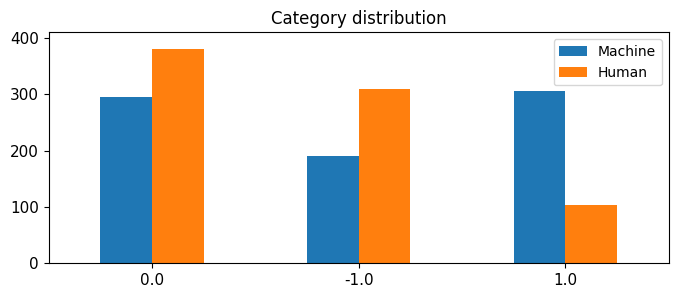

In [19]:
Merge =pd.DataFrame({
    "Machine":df.sentiment.value_counts(),
    "Human":df.label.value_counts()
})

Merge = Merge.sort_values(by="Human", ascending=False)
Merge.plot(kind='bar',
           title='Category distribution',
           ylim=[0, Merge.values.max() + 30],
           rot=0, fontsize=11, figsize=(8,3),
           color=['tab:blue', 'tab:orange'])

plt.legend(loc='upper right')
plt.show()   

### Feature Creation

In [20]:
import nltk
import helpers.data_mining_helpers as dmh
nltk.download("punkt")
nltk.download("punkt_tab")
from sklearn.feature_extraction.text import CountVectorizer
import plotly as py

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ring9\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\ring9\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [25]:
count_vect=CountVectorizer(analyzer="word")
count_vect.fit_transform(df["text"])

<792x4259 sparse matrix of type '<class 'numpy.int64'>'
	with 16243 stored elements in Compressed Sparse Row format>

In [26]:
df["unigrams"]=df["text"].apply(lambda text:count_vect.build_analyzer()(text))

In [27]:
df[0:4]["unigrams"]

0                                 [calls, on, retards]
2             [seeing, lots, of, red, in, the, ticker]
3    [vision, marine, technologies, inc, is, rewrit...
4                          [he, didn, say, thank, you]
Name: unigrams, dtype: object

In [28]:
df.columns

Index(['type', 'datetime', 'subreddit', 'title', 'upvotes', 'text',
       'subjectivity', 'polarity', 'sentiment', 'entities', 'label',
       'unigrams'],
      dtype='object')

In [29]:
df_counts=count_vect.fit_transform(df.text)
print(df_counts.shape)

(792, 4259)


In [43]:
print(df_counts[0])
print()
print(df_counts[1])

  (np.int32(0), np.int32(680))	1
  (np.int32(0), np.int32(2646))	1
  (np.int32(0), np.int32(3180))	1

  (np.int32(0), np.int32(3316))	1
  (np.int32(0), np.int32(2316))	1
  (np.int32(0), np.int32(2627))	1
  (np.int32(0), np.int32(3084))	1
  (np.int32(0), np.int32(1980))	1
  (np.int32(0), np.int32(3766))	1
  (np.int32(0), np.int32(3804))	1


In [31]:
print(count_vect.get_feature_names_out()[680])
print(count_vect.get_feature_names_out()[2646])
print(count_vect.get_feature_names_out()[3180])   
print(df[0:1]["text"])

calls
on
retards
0    Calls on retards
Name: text, dtype: object


In [32]:
count_vect.get_feature_names_out()[0:10] 

array(['00', '000', '01378', '02', '027', '03', '06', '08', '10', '100'],
      dtype=object)

In [36]:
plot_x=["term_"+str(i) for i in count_vect.get_feature_names_out()[0:20]]

In [37]:
plot_y=["text_"+str(i) for i in list(df.index)[0:20]]

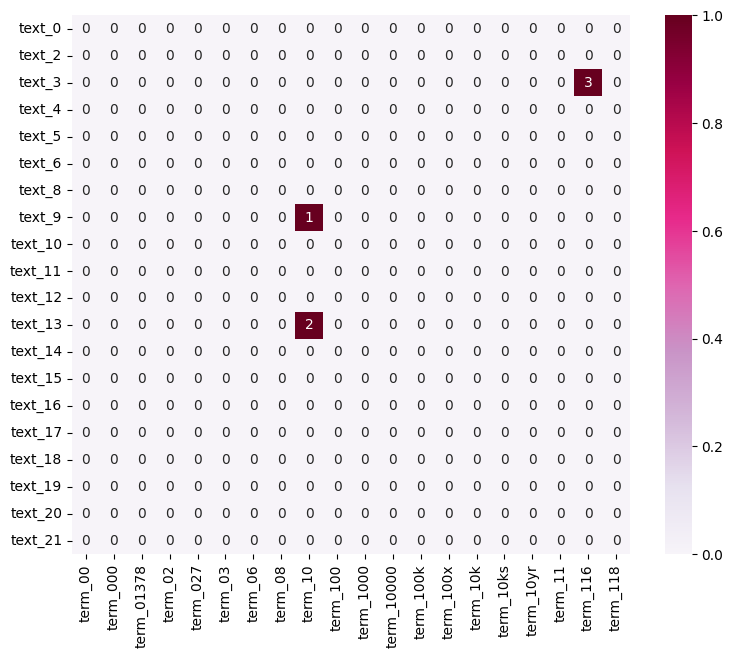

In [40]:
plot_z = df_counts[0:20, 0:20].toarray() 
import seaborn as sns

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
head_map= sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

In [80]:
first20=df_counts[:20,:]
mask=(first20.sum(axis=0)>0).A1

first20_nz=first_20_text[:,mask].toarray()

In [76]:
plot_x=np.array(count_vect.get_feature_names_out())[mask][0:20]
plot_y=["text_"+ str(i) for i in list(df.index)[0:20]]

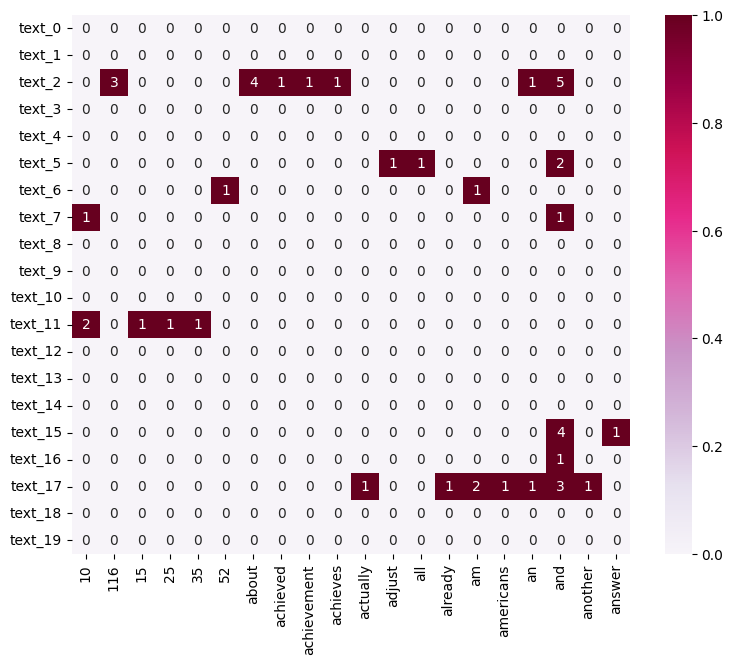

In [79]:
df_todraw=pd.DataFrame(first20_nz[:20,:20], columns=plot_x, index=plot_y)
plt.subplots(figsize=(9, 7))
first20_nz_heat_map = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

In [83]:
import plotly.express as px
term_frequencies=np.asarray(df_counts.sum(axis=0))[0]

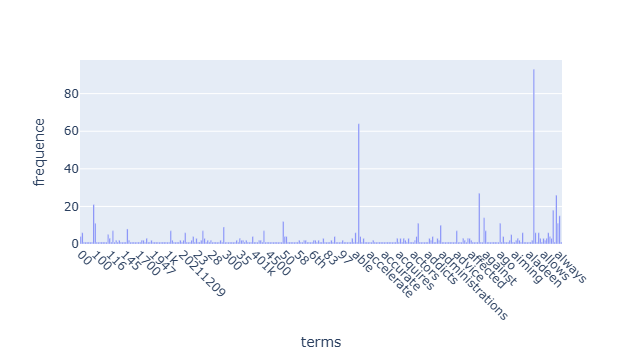

In [84]:
draw_to=pd.DataFrame({"terms":count_vect.get_feature_names_out()[:300],
                "frequence":term_frequencies[:300]})
g=px.bar(draw_to,x="terms",y="frequence")
g.update_traces(textposition="outside")
g.update_layout(xaxis_tickangle=45)
g.show()

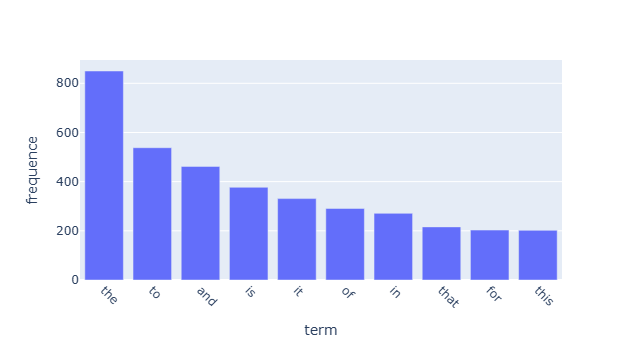

In [87]:
term_frequencies = np.asarray(df_counts.sum(axis=0))[0]
top_idx=np.argsort(-term_frequencies )[:10]

draw_to=pd.DataFrame({"term":count_vect.get_feature_names_out()[top_idx],
                  "frequence":term_frequencies[top_idx]})
g=px.bar(draw_to,x="term",y="frequence")
g.update_traces(textposition="outside")
g.update_layout(xaxis_tickangle=45)
g.show()

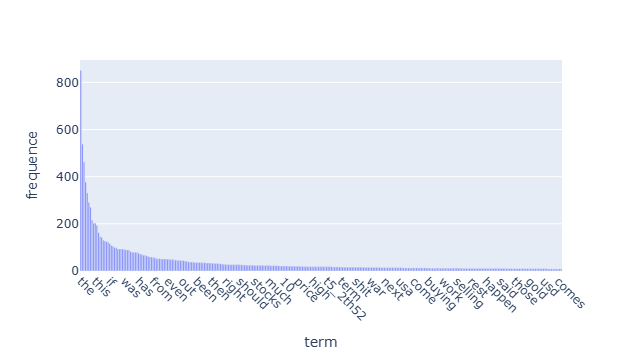

In [88]:
term_frequencies = np.asarray(df_counts.sum(axis=0))[0]
top_idx=np.argsort(-term_frequencies )[:300]

draw_to=pd.DataFrame({"term":count_vect.get_feature_names_out()[top_idx],
                  "frequence":term_frequencies[top_idx]})
g=px.bar(draw_to,x="term",y="frequence")
g.update_traces(textposition="outside")
g.update_layout(xaxis_tickangle=45)
g.show()

C:\Users\ring9\AppData\Local\Temp\ipykernel_19816\2426724564.py:6: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



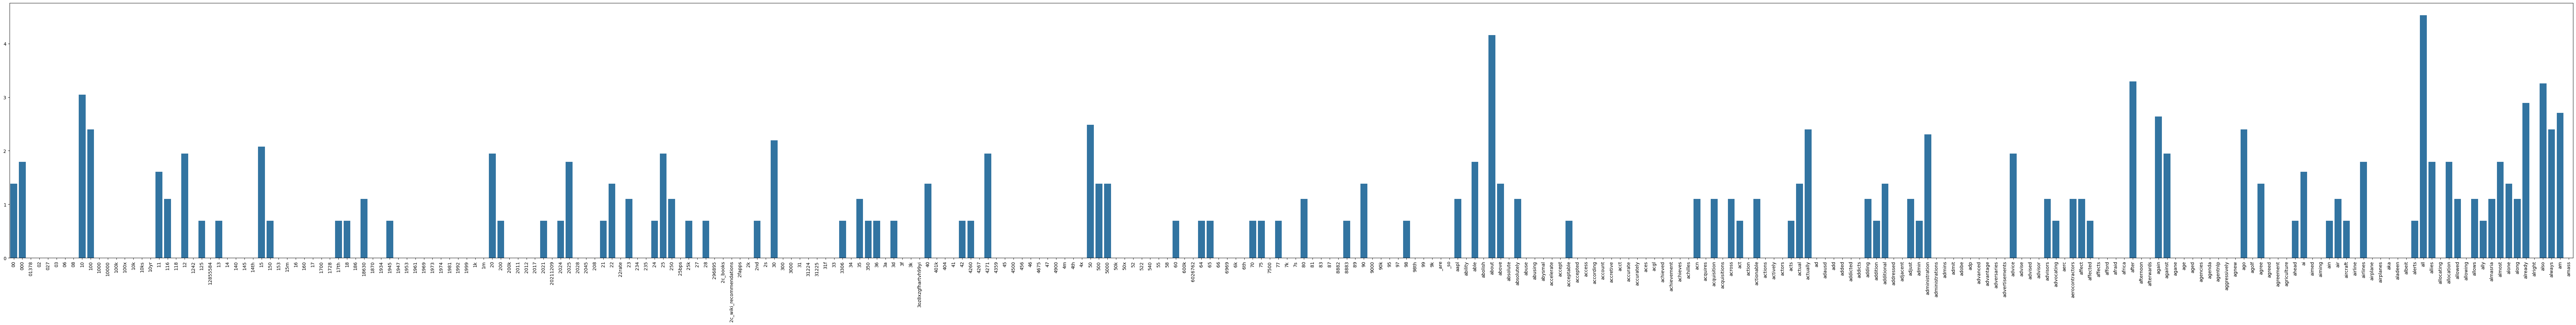

In [89]:
import math
term_frequencies_log = [math.log(i) for i in term_frequencies]
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300],
                y=term_frequencies_log[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);

In [ ]:
term_frequencies_log = [math.log(i) for i in term_frequencies]


draw=pd.DataFrame({"term":count_vect.get_feature_names_out()[0:300],
                  "frequence_log":term_frequencies_log[0:300]})
g=px.bar(df,x="term",y="frequence_log")
g.update_traces(textposition="outside")
g.update_layout(xaxis_tickangle=45)
g.show()

# Phase 2

In [ ]:
### Begin Assignment Here